In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [2]:
xs = np.array([[x1, x2] for x1 in np.linspace(0, math.pi, 20) for x2 in np.linspace(0, 2*math.pi, 20)])
ys = 3*np.sin(np.sum(xs, axis = 1, keepdims=True)) + 10
ys.shape

(400, 1)

In [3]:
mu = np.mean(xs, axis=0)
sig = np.std(xs, axis=0)
xs = (xs-mu)/sig

In [4]:
xs.shape

(400, 2)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[2], activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [6]:
ys_pre = model.predict(xs)

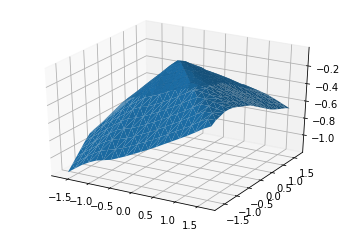

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xs[:, 0].flatten(), xs[:, 1].flatten(), ys_pre.flatten())

In [8]:
model.compile(optimizer="adam", loss="mse")
model.fit(xs, ys, epochs=500, verbose=2)
ys_post = model.predict(xs)

Train on 400 samples
Epoch 1/500
400/400 - 0s - loss: 115.2828
Epoch 2/500
400/400 - 0s - loss: 112.8402
Epoch 3/500
400/400 - 0s - loss: 110.7766
Epoch 4/500
400/400 - 0s - loss: 109.0202
Epoch 5/500
400/400 - 0s - loss: 107.5041
Epoch 6/500
400/400 - 0s - loss: 106.1891
Epoch 7/500
400/400 - 0s - loss: 105.0324
Epoch 8/500
400/400 - 0s - loss: 103.9696
Epoch 9/500
400/400 - 0s - loss: 102.9268
Epoch 10/500
400/400 - 0s - loss: 101.8321
Epoch 11/500
400/400 - 0s - loss: 100.6490
Epoch 12/500
400/400 - 0s - loss: 99.3589
Epoch 13/500
400/400 - 0s - loss: 97.9461
Epoch 14/500
400/400 - 0s - loss: 96.3812
Epoch 15/500
400/400 - 0s - loss: 94.6809
Epoch 16/500
400/400 - 0s - loss: 92.8107
Epoch 17/500
400/400 - 0s - loss: 90.7566
Epoch 18/500
400/400 - 0s - loss: 88.5126
Epoch 19/500
400/400 - 0s - loss: 86.0154
Epoch 20/500
400/400 - 0s - loss: 83.3108
Epoch 21/500
400/400 - 0s - loss: 80.2657
Epoch 22/500
400/400 - 0s - loss: 76.7896
Epoch 23/500
400/400 - 0s - loss: 72.7649
Epoch 24/50

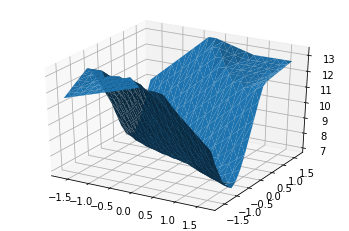

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xs[:, 0].flatten(), xs[:, 1].flatten(), ys_post.flatten())